In [22]:
%load_ext autoreload
%autoreload 2
from pyMOSChar import MosData
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
mos_data = MosData.read_db('work/sky130_PDK_W1u.json.gz')

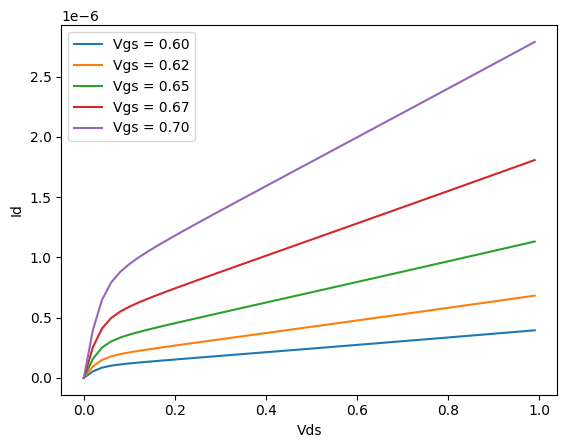

In [49]:
fig, ax = plt.subplots()

for vgs in np.linspace(0.6,0.7,5):
    VDS = np.arange(0, 1, 0.01)
    mid = mos_data.lookup('nfet', 'id', vds=VDS, vsb=0, l=0.5, vgs=vgs)
    ax.plot(VGS, mid, label=f'Vgs = {vgs:.2f}')

ax.set_xlabel('Vds')
ax.legend()
ax.set_ylabel('Id');

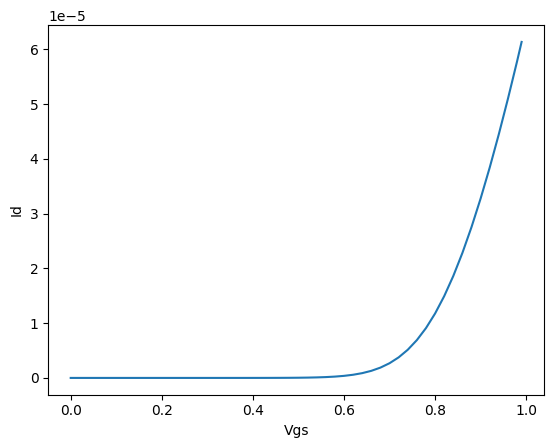

In [15]:
VGS = np.arange(0, 1, 0.01)
mid = mos_data.lookup('nfet', 'id', vds=0.9, vsb=0, l=0.5, vgs=VGS)

fig, ax = plt.subplots()
ax.plot(VGS, mid)
ax.set_xlabel('Vgs')
ax.set_ylabel('Id');

In [21]:
mos_data.lookup('nfet','gm/cgg')[mos_data.lookup('nfet','gm/id') == 1]

<string>:1: RuntimeWarning: invalid value encountered in divide


array([], dtype=float64)

In [298]:
mos_data.lookup('nfet','gm/cgg').shape

(51,)

In [280]:
def find_nearest(array, value):
    array = np.nan_to_num(np.asarray(array),0)
    idx = np.array((np.abs(array-value)<0.0001).nonzero())
    index = []
    values = []
    for point in idx.T:
        idx = point.reshape((4,1))
        index.append(idx.squeeze())
        values.append(array[np.ix_(*idx)])
    return index,values

In [295]:
idx,values = find_nearest((mos_data.nfet.gm/mos_data.nfet.id), 10)
print("L, VSB, VDS, VGS")
for i,j in zip(idx,values):
    print(i,'->',j)

L, VSB, VDS, VGS
[ 0  0 39 43] -> [[[[10.0000716]]]]
[ 0 37  3 48] -> [[[[10.00005673]]]]
[ 2  2 14 37] -> [[[[9.99992367]]]]
[ 4 45 10 45] -> [[[[10.00006079]]]]
[ 5 23 41 41] -> [[[[9.99998295]]]]
[ 7 39  6 42] -> [[[[10.0000957]]]]
[ 9 31 47 42] -> [[[[9.9999455]]]]
[11 37 24 43] -> [[[[10.00001816]]]]
[16 38 31 43] -> [[[[10.00006707]]]]
[17 22 25 40] -> [[[[9.99994735]]]]


/tmp/ipykernel_26941/2063958219.py:1: RuntimeWarning: invalid value encountered in divide
  idx,values = find_nearest((mos_data.nfet.gm/mos_data.nfet.id), 10)


In [288]:
mos_data.nfet.length

array([ 0.15,  5.15, 10.15, 15.15, 20.15, 25.15, 30.15, 35.15, 40.15,
       45.15, 50.15, 55.15, 60.15, 65.15, 70.15, 75.15, 80.15, 85.15,
       90.15, 95.15])

In [290]:
mos_data.nfet.vsb

array([-0.  , -0.02, -0.04, -0.06, -0.08, -0.1 , -0.12, -0.14, -0.16,
       -0.18, -0.2 , -0.22, -0.24, -0.26, -0.28, -0.3 , -0.32, -0.34,
       -0.36, -0.38, -0.4 , -0.42, -0.44, -0.46, -0.48, -0.5 , -0.52,
       -0.54, -0.56, -0.58, -0.6 , -0.62, -0.64, -0.66, -0.68, -0.7 ,
       -0.72, -0.74, -0.76, -0.78, -0.8 , -0.82, -0.84, -0.86, -0.88,
       -0.9 , -0.92, -0.94, -0.96, -0.98, -1.  ])